<a href="https://colab.research.google.com/github/Sushmashreeps10/Machine-Learning/blob/main/Sentiment_Analysis_on_Social_Media_Posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project is about sentiment analysis on the Post Generator Dataset from Kaggle, which contains user posts in different languages. The data was cleaned by converting text to lowercase, removing punctuation, numbers, and stopwords. Using TextBlob, each post was classified as Positive, Negative, or Neutral based on sentiment polarity. The project also explored the most common words in each sentiment and created visualizations like bar charts and word clouds to better understand patterns. The final dataset includes both the cleaned text and sentiment labels, showing how NLP can be used to analyze opinions and trends in user-generated content.**

The dataset stores each post as text inside a JSON file (raw_posts.json / enriched_posts.json).

Each record looks like:

{
  "text": "sample post here",
  "engagement": 120,
  "language": "English",
  "engagement_class": 1,
  "cleaned_text": "sample post here"
}



---



We used TextBlob (a Natural Language Processing NLP library).

TextBlob calculates a polarity score between -1.0 and +1.0:

0.1 → Positive

-0.1 → Negative

-0.1 to 0.1 → Neutral

Example:

"I love this product!" → Polarity = 0.8 → Positive

"This is terrible." → Polarity = -0.7 → Negative

"It is a book." → Polarity = 0.0 → Neutral

So, every post is read as text, cleaned, then scored for sentiment using polarity.

In [39]:

import kagglehub
import pandas as pd
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import json
import kagglehub
import pandas as pd
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [40]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prishatank/post-generator-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/post-generator-dataset


In [41]:
import kagglehub
path = kagglehub.dataset_download("prishatank/post-generator-dataset")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Path to dataset files: /kaggle/input/post-generator-dataset
First 5 rows:
                                                 text  engagement  line_count  \
0  Just saw a LinkedIn Influencer with 'Organic G...          90           3   
1  Jobseekers, this one’s for you.\n Every applic...         347           8   
2  Looking for jobs on LinkedIn is like online da...         109           1   
3  LinkedIn scams be like: 'Congratulations, you'...         115           3   
4  sapne dekhna achi baat hai,\nlekin job ka sapn...         545           3   

  language                              tags           tone  
0  English     [Influencer, Personal Growth]   Professional  
1  English       [Mental Health, Job Search]  Inspirational  
2  English       [Online Dating, Job Search]       Humorous  
3  English                 [Scams, LinkedIn]       Humorous  
4    Hindi  [Career Development, Job Search]       Humorous  

Sample with Sentiment:
                                                

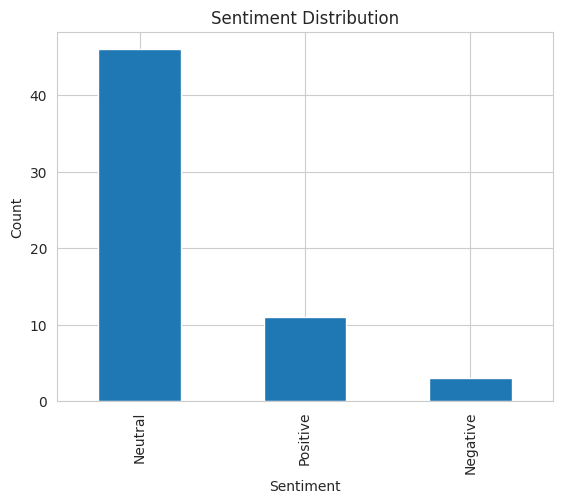

In [33]:
# Download stopwords (first time only)
nltk.download("stopwords")

# --- Step 1: Download dataset ---
path = kagglehub.dataset_download("prishatank/post-generator-dataset")
print("Path to dataset files:", path)

# --- Step 2: Load JSON file safely ---
file_path = os.path.join(path, "enriched_posts.json")

with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    data = json.load(f)

df = pd.DataFrame(data)
print("First 5 rows:\n", df.head())

# --- Step 3: Preprocess text ---
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)

# --- Step 4: Sentiment Analysis ---
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_text"].apply(get_sentiment)

# --- Step 5: Results ---
print("\nSample with Sentiment:\n", df[["text", "clean_text", "sentiment"]].head())

print("\nSentiment Distribution:\n", df["sentiment"].value_counts())

# --- Optional: Visualization ---
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [42]:

# --- Step 1: Download dataset ---
path = kagglehub.dataset_download("prishatank/post-generator-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/post-generator-dataset


In [44]:
# --- Step 2: Load JSON file safely ---
file_path = os.path.join(path, "enriched_posts.json")

with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    data = json.load(f)

df = pd.DataFrame(data)
print("First 5 rows:\n", df.head())


First 5 rows:
                                                 text  engagement  line_count  \
0  Just saw a LinkedIn Influencer with 'Organic G...          90           3   
1  Jobseekers, this one’s for you.\n Every applic...         347           8   
2  Looking for jobs on LinkedIn is like online da...         109           1   
3  LinkedIn scams be like: 'Congratulations, you'...         115           3   
4  sapne dekhna achi baat hai,\nlekin job ka sapn...         545           3   

  language                              tags           tone  
0  English     [Influencer, Personal Growth]   Professional  
1  English       [Mental Health, Job Search]  Inspirational  
2  English       [Online Dating, Job Search]       Humorous  
3  English                 [Scams, LinkedIn]       Humorous  
4    Hindi  [Career Development, Job Search]       Humorous  


In [45]:
# --- Step 3: Preprocess text ---
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)

In [46]:
# --- Step 4: Sentiment Analysis ---
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_text"].apply(get_sentiment)


Sentiment Distribution:
 sentiment
Neutral     46
Positive    11
Negative     3
Name: count, dtype: int64


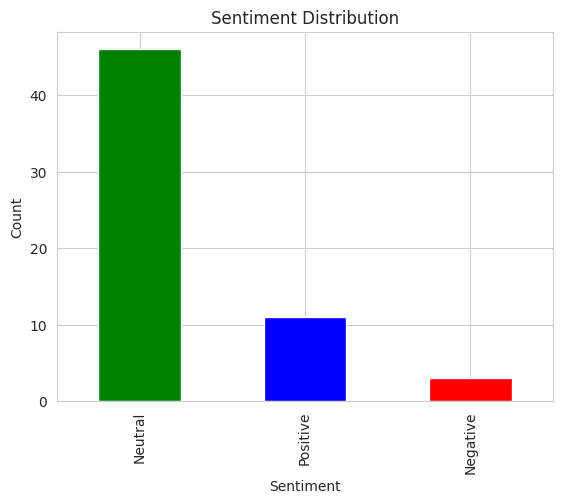

In [47]:
# --- Step 5: Sentiment distribution ---
print("\nSentiment Distribution:\n", df["sentiment"].value_counts())

df["sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution", color=["green","blue","red"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


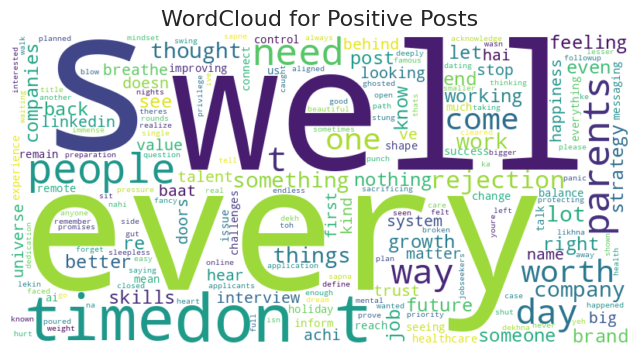

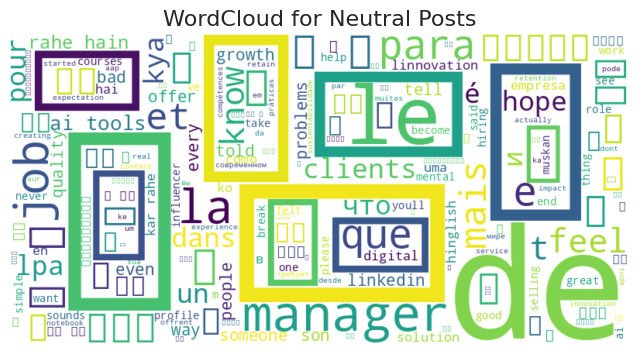

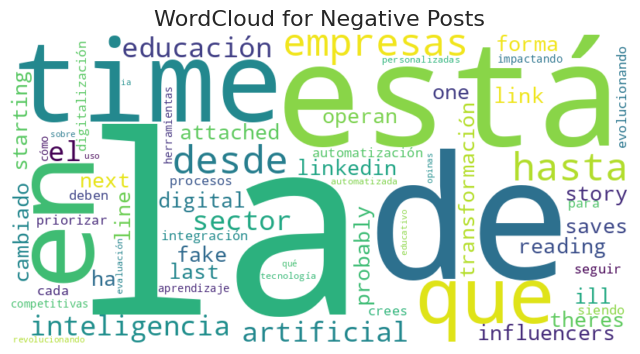

In [48]:
# --- Step 6: Word Clouds ---
def generate_wordcloud(text_series, title):
    text = " ".join(text_series)
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(8,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

for sentiment in ["Positive", "Neutral", "Negative"]:
    generate_wordcloud(df[df["sentiment"]==sentiment]["clean_text"], f"WordCloud for {sentiment} Posts")

In [49]:
# --- Step 7: Top frequent words per sentiment ---
def top_words(text_series, n=10):
    words = " ".join(text_series).split()
    return Counter(words).most_common(n)

for sentiment in ["Positive", "Neutral", "Negative"]:
    print(f"\nTop words in {sentiment} posts:")
    print(top_words(df[df["sentiment"]==sentiment]["clean_text"], 10))


Top words in Positive posts:
[('every', 8), ('don’t', 8), ('time', 7), ('well', 7), ('people', 6), ('need', 6), ('parents', 6), ('worth', 4), ('come', 4), ('like', 4)]

Top words in Neutral posts:
[('है', 9), ('de', 9), ('manager', 8), ('क्या', 7), ('في', 7), ('la', 7), ('like', 6), ('job', 6), ('ai', 6), ('para', 6)]

Top words in Negative posts:
[('la', 9), ('de', 4), ('está', 3), ('time', 2), ('en', 2), ('que', 2), ('las', 2), ('empresas', 2), ('desde', 2), ('hasta', 2)]
